In [1]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np


In [6]:
data = [[3,1.5,1],
       [2,1,0],
       [4,1.5,1],
        [3,1,0],
       [3.5,1,1],
       [2,.5,0],
       [5.5,1,1],
       [1,1,0]]

mystery_flower = [4.5, 1]


In [7]:
#network

#    o flower type
#   / \ w1,w2,b
#  o   o length, width
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x)*(1-sigmoid(x))

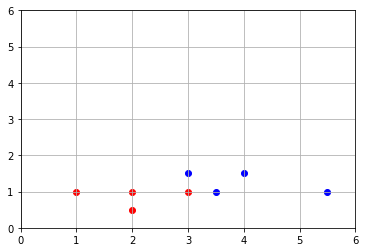

In [18]:
#scatter data
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    color = 'r'
    if(point[2] == 0):
        color = 'b'
    point = data[i]
    plt.scatter(point[0],point[1],c=color)

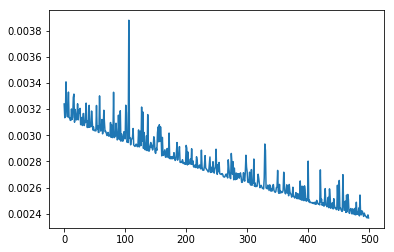

In [46]:
#training loop
learning_rate = .2
costs=[]
for i in range(50000):
    ri  = np.random.randint(len(data))
    point = data[ri]
    z = point[0]*w1 + point[1]*w2 + b
    h = sigmoid(z)
    target = point[2]
    cost = np.square(h - target)
    
    
    
    dcost_pred = 2*(h- target)
    dpred_dz = sigmoid_p(z)
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dw1 = dcost_pred* dpred_dz* dz_dw1
    dcost_dw2 = dcost_pred* dpred_dz* dz_dw2
    dcost_db = dcost_pred* dpred_dz* dz_db
    
    w1 = w1 - learning_rate *dcost_dw1
    w2 = w2 - learning_rate *dcost_dw2
    b = b - learning_rate *dcost_db
    
    if( i % 100 == 0):
        cost_sum = 0
        for j in range(len(data)):
            point = data[j]
            z = point[0]*w1 + point[1]*w2 + b
            h = sigmoid(z)
            target = point[2]
            cost_sum += np.square(h - target)
        costs.append(cost_sum/len(data))
plt.plot(costs)

In [47]:
for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.9430260400542321
[2, 1, 0]
pred: 9.46128804999254e-06
[4, 1.5, 1]
pred: 0.9999940576184952
[3, 1, 0]
pred: 0.08775197785716857
[3.5, 1, 1]
pred: 0.9065356286637033
[2, 0.5, 0]
pred: 5.498586406971826e-08
[5.5, 1, 1]
pred: 0.999999999002571
[1, 1, 0]
pred: 9.30603676207203e-10


In [48]:
z = mystery_flower[0]*w1 + mystery_flower[1]*w2 + b
pred = sigmoid(z)
pred

0.99998985931720374

In [49]:
def which_flower(length, width):
    z = length*w1 + width*w2 + b
    pred = sigmoid(z)
    print(pred)
    if(pred<.5):
        print("BLUE")
    else:
        print("RED")

In [52]:
which_flower(0,1.23)

9.77234229776e-13
BLUE
